In [2]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from path_explain.utils import set_up_environment
from preprocess import mitbih_dataset

In [3]:
set_up_environment(visible_devices='3')

In [4]:
x_train, y_train, x_test, y_test = mitbih_dataset()

In [5]:
original_model = tf.keras.models.load_model('model.h5')
y_pred = original_model.predict(x_test)
y_pred_max = np.argmax(y_pred, axis=-1)

In [6]:
batch_inputs_by_class = []
for c in range(5):
    class_mask = np.logical_and(y_test == c,
                                y_pred_max == y_test)
    class_indices = np.where(class_mask)[0][:100]

    batch_samples = x_test[class_indices]
    batch_inputs_by_class.append(batch_samples)
batch_inputs_by_class = np.stack(batch_inputs_by_class, axis=0)

In [7]:
attributions_array = []
interactions_array = []
for c in range(5):
    attributions = np.load(f'attributions_{c}.npy')
    interactions = np.load(f'interactions_{c}.npy')
    attributions_array.append(attributions)
    interactions_array.append(interactions)
attributions_by_class = np.stack(attributions_array, axis=0)
interactions_by_class = np.stack(interactions_array, axis=0)

In [8]:
batch_inputs_by_class = np.squeeze(batch_inputs_by_class)
attributions_by_class = np.squeeze(attributions_by_class)
interactions_by_class = np.squeeze(interactions_by_class)

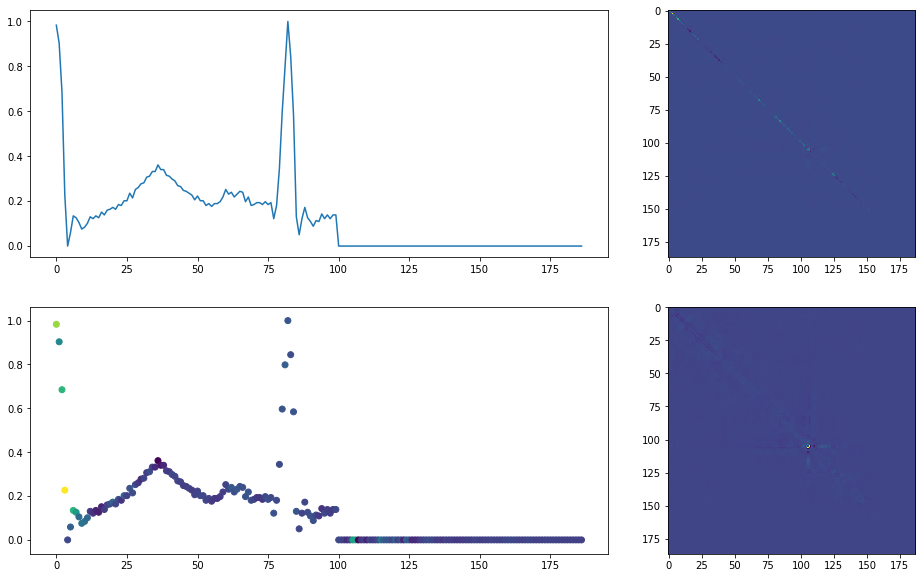

In [11]:
c = 0
i = 0
fig = plt.figure(figsize=(16, 10))
gs = mpl.gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

ax1.plot(np.arange(batch_inputs_by_class.shape[-1]),
            batch_inputs_by_class[c, i])
ax2.scatter(x=np.arange(batch_inputs_by_class.shape[-1]),
               y=batch_inputs_by_class[c, i],
               c=attributions_by_class[c, i])

zero_diagonal_interactions = interactions_by_class[c, i].copy()
np.fill_diagonal(zero_diagonal_interactions, 0.0)
ax3.imshow(interactions_by_class[c, i])
ax4.imshow(zero_diagonal_interactions)

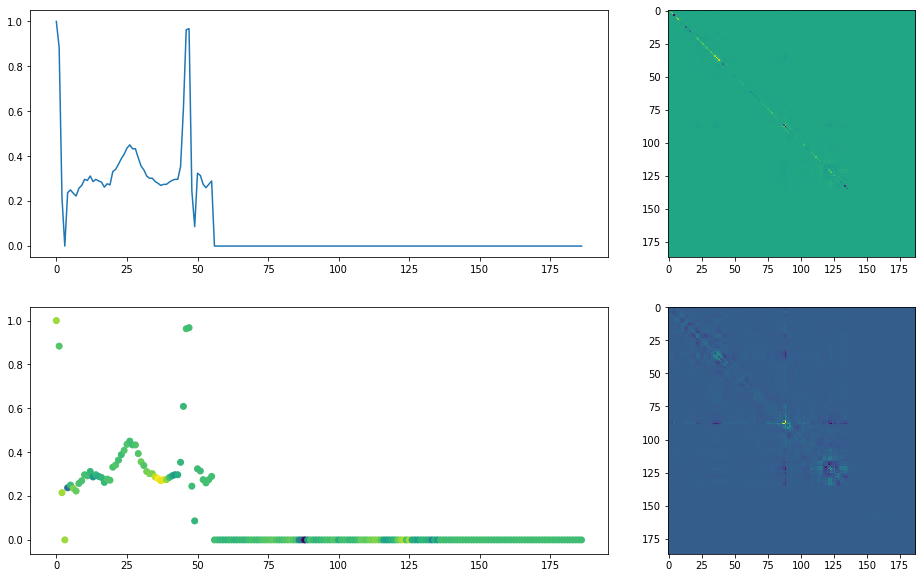

In [12]:
c = 1
i = 0
fig = plt.figure(figsize=(16, 10))
gs = mpl.gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

ax1.plot(np.arange(batch_inputs_by_class.shape[-1]),
            batch_inputs_by_class[c, i])
ax2.scatter(x=np.arange(batch_inputs_by_class.shape[-1]),
               y=batch_inputs_by_class[c, i],
               c=attributions_by_class[c, i])

zero_diagonal_interactions = interactions_by_class[c, i].copy()
np.fill_diagonal(zero_diagonal_interactions, 0.0)
ax3.imshow(interactions_by_class[c, i])
ax4.imshow(zero_diagonal_interactions)

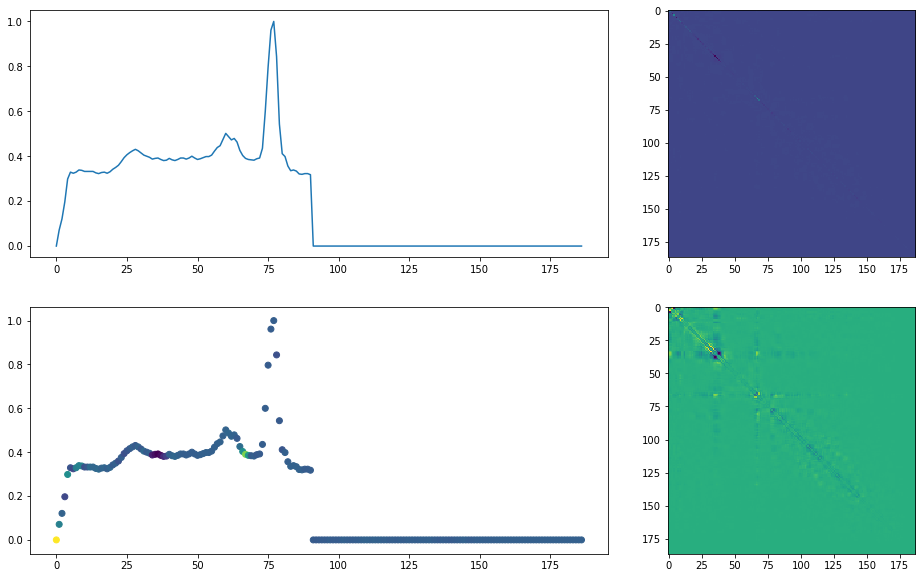

In [14]:
c = 2
i = 0
fig = plt.figure(figsize=(16, 10))
gs = mpl.gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

ax1.plot(np.arange(batch_inputs_by_class.shape[-1]),
            batch_inputs_by_class[c, i])
ax2.scatter(x=np.arange(batch_inputs_by_class.shape[-1]),
               y=batch_inputs_by_class[c, i],
               c=attributions_by_class[c, i])

zero_diagonal_interactions = interactions_by_class[c, i].copy()
np.fill_diagonal(zero_diagonal_interactions, 0.0)
ax3.imshow(interactions_by_class[c, i])
ax4.imshow(zero_diagonal_interactions)

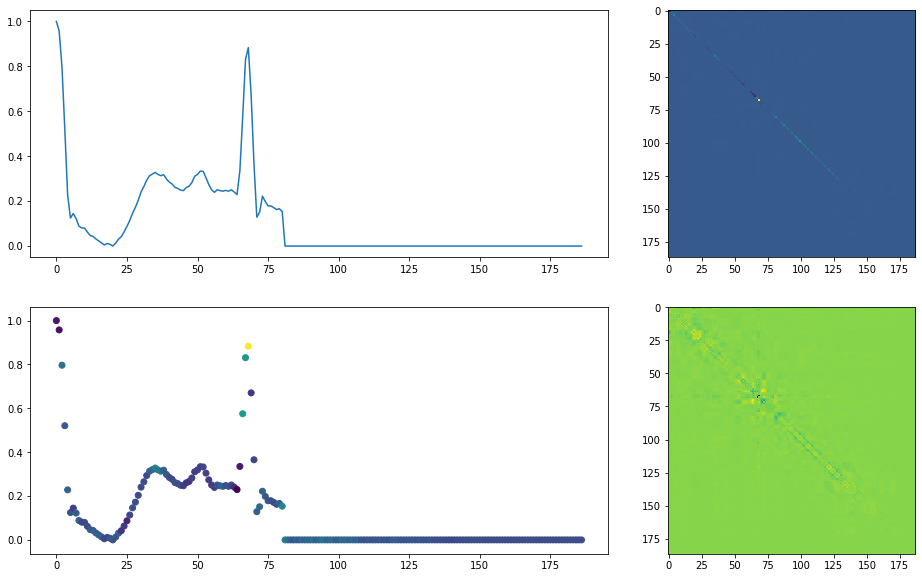

In [15]:
c = 3
i = 0
fig = plt.figure(figsize=(16, 10))
gs = mpl.gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

ax1.plot(np.arange(batch_inputs_by_class.shape[-1]),
            batch_inputs_by_class[c, i])
ax2.scatter(x=np.arange(batch_inputs_by_class.shape[-1]),
               y=batch_inputs_by_class[c, i],
               c=attributions_by_class[c, i])

zero_diagonal_interactions = interactions_by_class[c, i].copy()
np.fill_diagonal(zero_diagonal_interactions, 0.0)
ax3.imshow(interactions_by_class[c, i])
ax4.imshow(zero_diagonal_interactions)

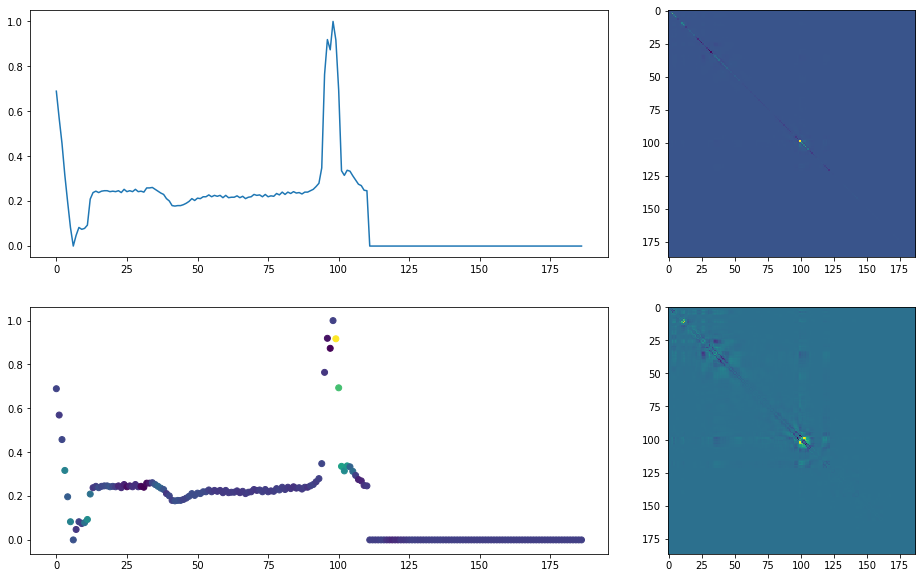

In [16]:
c = 4
i = 0
fig = plt.figure(figsize=(16, 10))
gs = mpl.gridspec.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

ax1.plot(np.arange(batch_inputs_by_class.shape[-1]),
            batch_inputs_by_class[c, i])
ax2.scatter(x=np.arange(batch_inputs_by_class.shape[-1]),
               y=batch_inputs_by_class[c, i],
               c=attributions_by_class[c, i])

zero_diagonal_interactions = interactions_by_class[c, i].copy()
np.fill_diagonal(zero_diagonal_interactions, 0.0)
ax3.imshow(interactions_by_class[c, i])
ax4.imshow(zero_diagonal_interactions)